# 如何喵喵叫

## 风笛
### TB/T 3051-2002 机车风笛声学性能技术要求及测量
参考加拿大法规 1986/10《机车风笛信号及警钟发声相应设备规范》中有关风笛测量方法和声级的规定，加拿大谐和式风笛制造有限公司关于机车风笛发声频率的规定，UIC 644 O 1980.7.1第2版《国际联运用机车所安装的警报器》标准中关于机车风笛发声频率的规定，并经近年在我国研究改进及现场对比实验的基础上提出的。

4.2 工作频率

风笛的发声频率可以由多个频率组成，但应保持谐和。频率组合可采用以下方式：

* a) 由两个喇叭组成的机车风笛，其工作频率可分为:
    * --370Hz+-15Hz和660Hz+-15Hz
    * --311Hz+-15Hz和470Hz+-15Hz
* b) 由3个喇叭组成的机车风笛，其工作频率可分为：
    * --311Hz+-15Hz,370Hz+-15Hz和470Hz+-15Hz
    * --311Hz+-15Hz,370Hz+-15Hz和494Hz+-15Hz

### TB/T 3051.2-2009 机车、动车用电笛、风笛 第2部分：风笛
频率与旧版无差异


### TB/T 3051.2-2016 机车、动车用电笛、风笛 第2部分：风笛
5.2 工作频率

风笛的发声频率可以由多个频率组成，但应保持谐和。频率组合可采用以下方式：
* a) 由2种喇叭（频率）组成的风笛，其工作频率可分为:
    * --370Hz+-15Hz和660Hz+-15Hz
    * --311Hz+-15Hz和470Hz+-15Hz
    * --370Hz+-20Hz和622Hz+-30Hz
* b) 由3种喇叭（频率）组成的风笛，其工作频率可分为：
    * --311Hz+-15Hz,370Hz+-15Hz和470Hz+-15Hz
    * --311Hz+-15Hz,370Hz+-15Hz和494Hz+-15Hz
    * --311Hz+-15Hz,470Hz+-15Hz和622Hz+-15Hz
* c) 由5种喇叭（频率）组成的风笛，其工作频率为：
    * --311Hz+-15Hz,370Hz+-15Hz,470Hz+-15Hz,512Hz+-15Hz和622Hz+-15Hz

## 电笛
### TB/T 3051.1-2009 机车、动车用电笛、风笛 第1部分：电笛
5.6 工作频率

由1个笛组成的电笛，其工作频率可为：630Hz+-15Hz，1000Hz+-15Hz，1600Hz+-15Hz

### TB/T 2325.3-2020 机车车辆视听警示装置 第3部分：电笛
频率与旧版无差异

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Audio, clear_output
import random
from enum import Enum

plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
frequencies: dict[str, list[tuple[int, int]]] = {
    "风笛_2喇叭_370_660": [(370, 15), (660, 15)],
    "风笛_2喇叭_311_470": [(311, 15), (470, 15)],
    "风笛_2喇叭_370_622": [(370, 20), (622, 30)],
    "风笛_3喇叭_311_370_470": [(311, 15), (370, 15), (470, 15)],
    "风笛_3喇叭_311_370_494": [(311, 15), (370, 15), (494, 15)],
    "风笛_3喇叭_311_470_622": [(311, 15), (470, 15), (622, 15)],
    "风笛_5喇叭_311_370_470_512_622": [
        (311, 15),
        (370, 15),
        (470, 15),
        (512, 15),
        (622, 15),
    ],
    "电笛_1喇叭_630_1000_1600": [(630, 15), (1000, 15), (1600, 15)],
}


class WaveformType(Enum):
    SINE = "正弦波"
    SQUARE = "方波"
    SAWTOOTH = "锯齿波"
    TRIANGLE = "三角波"
    PULSE = "脉冲波"


In [3]:
def generate_audio(
    frequencies,
    with_error=False,
    waveform_type=WaveformType.SINE,
    duration=1,
    sample_rate=44100,
):
    audio_waveform = np.zeros(duration * sample_rate)
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    errors = []

    for freq, error in frequencies:
        if with_error:
            error_value = random.randint(-error, error)
            errors.append((freq, error_value))
            freq += error_value

        match waveform_type:
            case WaveformType.SINE:
                audio_waveform += np.sin(2 * np.pi * freq * time)
            case WaveformType.SQUARE:
                audio_waveform += np.sign(np.sin(2 * np.pi * freq * time))
            case WaveformType.SAWTOOTH:
                audio_waveform += 2 * (time * freq - np.floor(time * freq + 0.5))
            case WaveformType.TRIANGLE:
                audio_waveform += (
                    2 * np.abs(2 * (time * freq - np.floor(time * freq + 0.5))) - 1
                )
            case WaveformType.PULSE:
                pulse_wave = np.where(np.mod(time, 1 / freq) < 0.5 * (1 / freq), 1, -1)
                audio_waveform += pulse_wave

    audio_waveform = audio_waveform / np.max(np.abs(audio_waveform))

    return audio_waveform, errors

In [4]:
def play_audio(combo_name, with_error, waveform_type):
    freqs = frequencies[combo_name]
    audio_data, errors = generate_audio(
        freqs, with_error=with_error, waveform_type=waveform_type
    )

    plt.figure(figsize=(10, 4))
    plt.plot(audio_data[:10000])
    plt.title(f"音频波形 - {combo_name} ({waveform_type.value})")
    plt.xlabel("样本点")
    plt.ylabel("振幅")
    plt.show()

    if with_error:
        print("频率误差信息：")
        for freq, error in errors:
            print(f"原频率: {freq} Hz, 误差: {error} Hz")

    return Audio(audio_data, rate=44100)

Dropdown(description='猫猫组合:', index=6, options=('风笛_2喇叭_370_660', '风笛_2喇叭_311_470', '风笛_2喇叭_370_622', '风笛_3喇叭_…

Checkbox(value=False, description='带误差')

Dropdown(description='波形类型:', options=(<WaveformType.SINE: '正弦波'>, <WaveformType.SQUARE: '方波'>, <WaveformType.…

Button(description='喵', style=ButtonStyle())

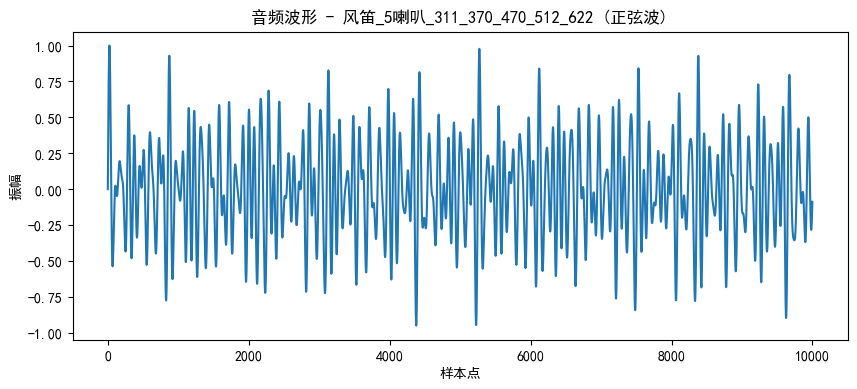

In [5]:
def on_button_click(b):
    clear_output(wait=True)
    display(combo_selector, error_checkbox, waveform_selector, play_button)
    audio = play_audio(
        combo_selector.value, error_checkbox.value, waveform_selector.value
    )
    display(audio)


combo_selector = widgets.Dropdown(
    options=frequencies.keys(), description="猫猫组合:", disabled=False
)

error_checkbox = widgets.Checkbox(value=False, description="带误差", disabled=False)


waveform_selector = widgets.Dropdown(
    options=WaveformType,
    description="波形类型:",
    disabled=False,
)


play_button = widgets.Button(description="喵")
play_button.on_click(on_button_click)

display(combo_selector, error_checkbox, waveform_selector, play_button)